# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.

Good luck! The resistance is counting on you.


In [1]:
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from matplotlib.colors import ListedColormap
from numpy.typing import NDArray
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    auc,
    make_scorer,
    mean_squared_log_error,
    roc_auc_score,
    roc_curve,
)
from sklearn.tree import DecisionTreeClassifier

from linear_regression import LinearRegression
from logistic_regression import LogisticRegression, sigmoid

In [2]:
%load_ext autoreload
%autoreload 2

size = 3.54
plt.rcParams["figure.figsize"] = (2.0 * size, size)
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.7

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission

Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task

Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements

1. **Implementation**:

   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.

   b. Analyze prediction error distribution. What is an unbiased estimator?

---


In [3]:
data = pd.read_csv("mission1.csv")

X_train = data["Net_Activity"].to_numpy()
y_train = data["Energy"].to_numpy()

Energy consumption formula: 3.02x+4.66


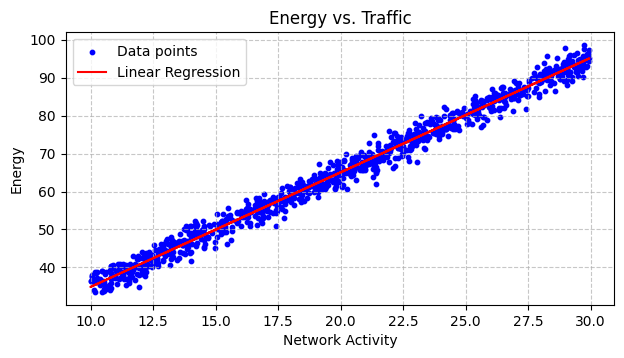

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

# 3a
print(f"Energy consumption formula: {lin_reg.formula}")

plt.scatter(X_train, y_train, s=10, c="blue", label="Data points")
plt.plot(X_train, y_pred, c="red", label="Linear Regression")
plt.title("Energy vs. Traffic")
plt.xlabel("Network Activity")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.show()

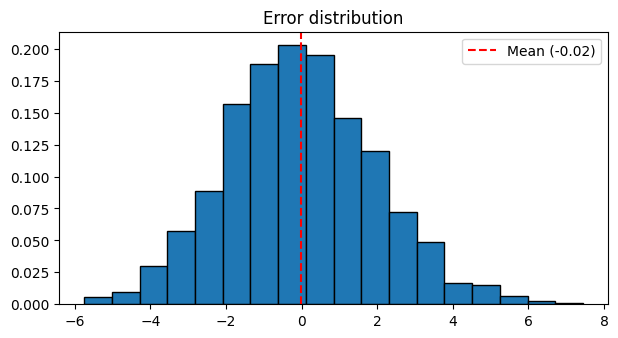

In [5]:
errors = lin_reg.errors(X_train, y_train)
mean = errors.mean()
plt.hist(errors, bins=18, density=True, edgecolor="black")
plt.title("Error distribution")
plt.axvline(mean, c="red", ls="--", label=f"Mean ({mean:.2f})")
plt.legend()
plt.show()

### 3b

An unbiased estimator is defined as an estimator that has an expected value equal to the true value of the parameter being estimated.
In other words, the error distribution of an unbiased estimator has a mean of zero.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery

SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission

1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements

1. **Implementation**:

   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

   d. Plot the ROC curve

---


In [6]:
data = pd.read_csv("mission2.csv")
train = data[data["split"] == "train"]
test = data[data["split"] == "test"]

X_columns = [f"x{i}" for i in range(2)]
y_column = "y"

X_train = train[X_columns].to_numpy()
y_train = train[y_column].to_numpy()
X_test = test[X_columns].to_numpy()
y_test = test[y_column].to_numpy()

In [7]:
def print_accuracy() -> None:
    print(f"Formula: {log_reg.formula}")
    print(f"Train accuracy: {log_reg.score(X_train, y_train):.2f}")
    print(f"Test accuracy: {log_reg.score(X_test, y_test):.2f}")


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print_accuracy()

Formula: [-0.14, 0.01]*x+0.09
Train accuracy: 0.51
Test accuracy: 0.49


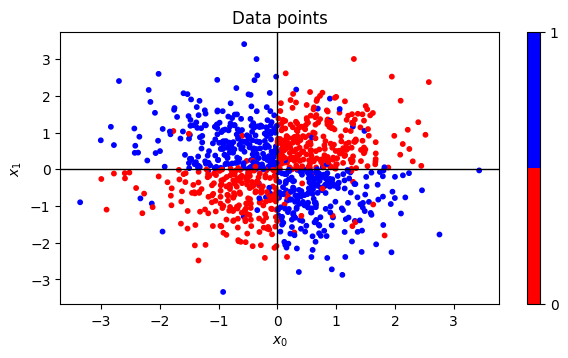

In [8]:
def plot_data() -> None:
    cmap = ListedColormap(["red", "blue"])

    for X, y in zip((X_train, X_test), (y_train, y_test)):
        plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap=cmap)

    plt.axvline(0, c="black", lw=1.0)
    plt.axhline(0, c="black", lw=1.0)
    plt.title("Data points")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.colorbar(ticks=[0, 1])
    plt.show()


plot_data()

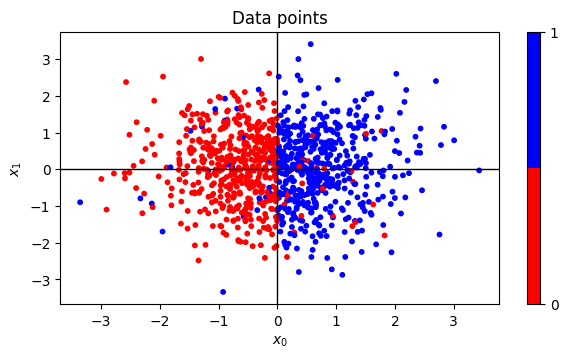

In [9]:
for X in (X_train, X_test):
    X[X[:, 1] > 0, 0] *= -1

plot_data()

In [10]:
log_reg.fit(X_train, y_train)
print_accuracy()

Formula: [3.13, -0.01]*x+0.01
Train accuracy: 0.95
Test accuracy: 0.95


### 2a

After plotting the data, it is clear that the data is not linearly separable.
This is why the initial logistic regression model performed poorly.
To improve the model, it was chosen to flip the third and fourth quadrants of the data, making it linearly separable.
Initially, it was chosen to flip the second and third quadrants, but the model only achieved accuracies of 0.92 (train) and 0.93 (test).


### 2b

The models inductive bias is that it assumes the data is linearly separable.
This is important because it allows the model to make predictions based on the assumption that the data is linearly separable.


In [11]:
seed = 69_420
dtc = DecisionTreeClassifier(random_state=seed)
dtc.fit(X_train, y_train)
print(f"Decision Tree Classifier accuracy: {dtc.score(X_test, y_test):.2f}")

Decision Tree Classifier accuracy: 0.88


### 2c

A Decision Tree Classifier can solve the problem because it can create a decision boundary that is not linear.


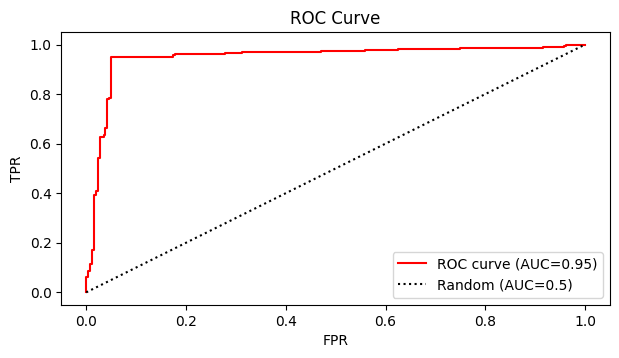

In [12]:
# 2d
def plot_roc() -> None:
    plt.plot(fpr, tpr, c="red", label=f"ROC curve ({AUC=:.2f})")
    plt.plot([0, 1], [0, 1], c="black", ls=":", label="Random (AUC=0.5)")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


z = log_reg.linear_transform(X_test)
y_score = sigmoid(z)
fpr, tpr, _ = roc_curve(y_test, y_score)
AUC = auc(fpr, tpr)

plot_roc()

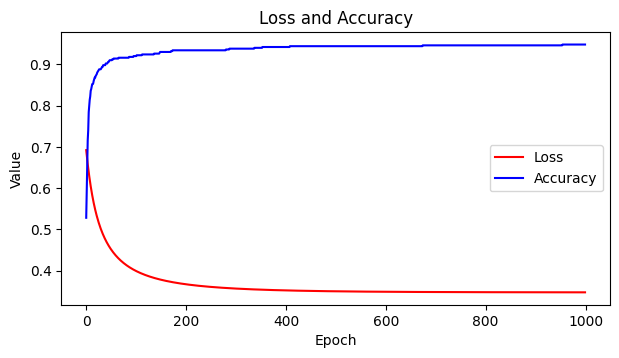

In [13]:
# Additional
plt.plot(log_reg.losses, c="red", label="Loss")
plt.plot(log_reg.accuracies, c="blue", label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Loss and Accuracy")
plt.legend()
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery

SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission

Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge

1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools

- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements

1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.

   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---


In [14]:
train = pd.read_csv("mission3_train.csv")
test = pd.read_csv("mission3_test.csv")

y_column = "target"

X_train = train.drop(columns=y_column)
y_train = train[y_column]
X_test = test.drop(columns=y_column)
y_test = test[y_column]

In [15]:
dtc = DecisionTreeClassifier(max_depth=6, random_state=seed)
dtc.fit(X_train, y_train)

print(
    "Decision Tree Classifier AUC: "
    f"{roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1]):.2f}"
)

Decision Tree Classifier AUC: 0.58


In [16]:
# rarity = 20
# reps = (100 - rarity) // rarity - 1
# Xs: list[NDArray[Any]] = []
# ys: list[NDArray[Any]] = []

# for X, y in zip((X_train, X_test), (y_train, y_test)):
#     indeces = y == 1
#     X_dupe = np.tile(X[indeces], (reps, 1))
#     y_dupe = np.tile(y[indeces], reps)
#     Xs.append(np.concatenate([X, X_dupe]))
#     ys.append(np.concatenate([y, y_dupe]))

# X_train, X_test = Xs
# y_train, y_test = ys

# rng = np.random.default_rng(seed=seed)
# shuffled_indices = rng.permutation(y_train.size)
# X_train = X_train[shuffled_indices]
# y_train = y_train[shuffled_indices]

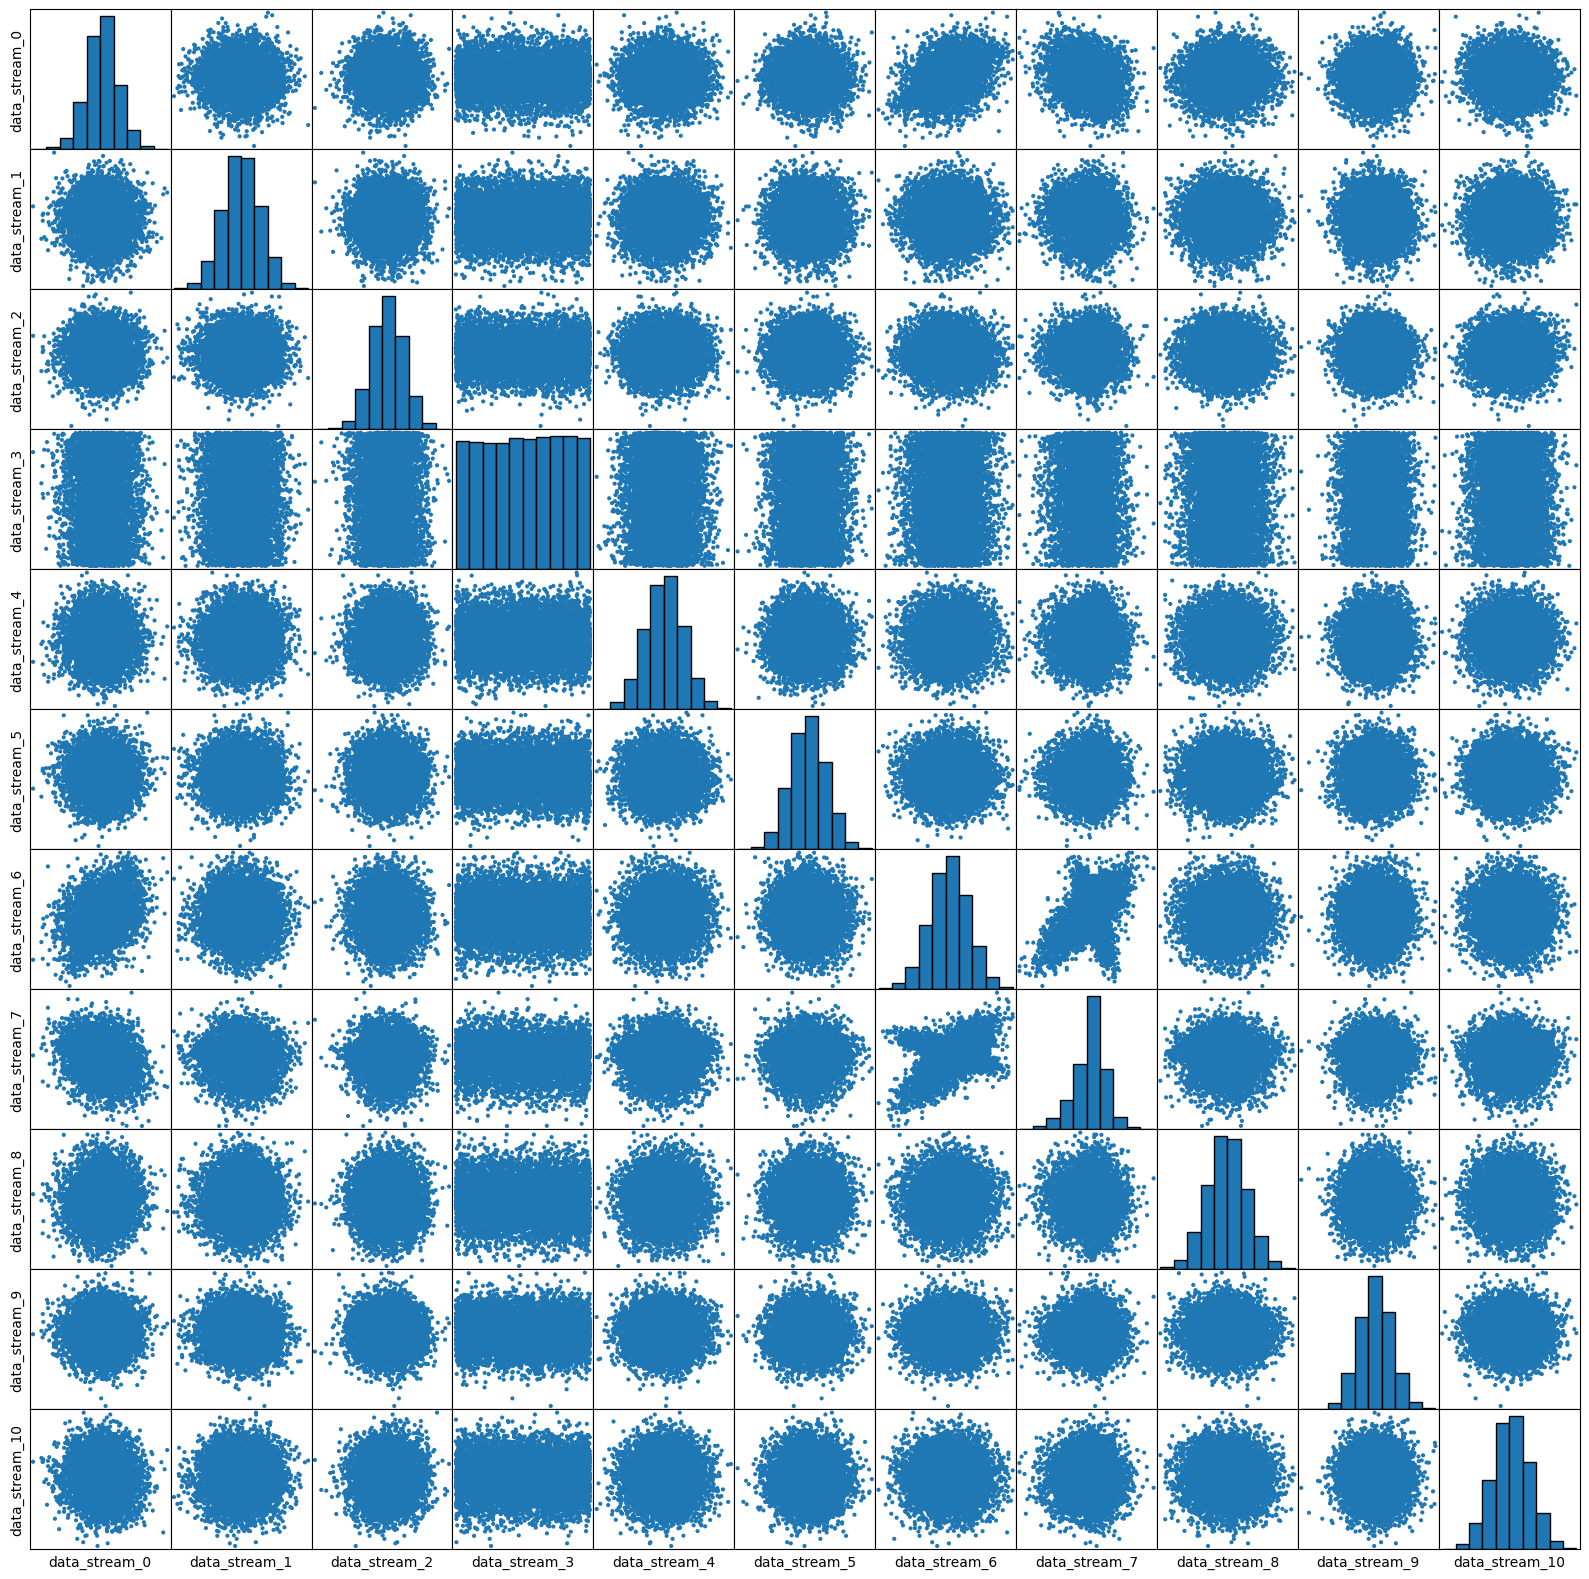

In [17]:
sm = scatter_matrix(
    train.drop(columns=y_column),
    alpha=1.0,
    figsize=(20, 20),
    hist_kwds={"edgecolor": "black"},
)

for axs in sm:
    for ax in axs:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

plt.show()

In [18]:
third_column = "data_stream_3"

for X in (X_train, X_test):
    X[third_column] = (X[third_column] * 1000).astype(int) % 2

In [19]:
dtc.fit(X_train, y_train)
y_score = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
AUC = auc(fpr, tpr)

print(f"Decision Tree Classifier AUC: {AUC:.2f}")

Decision Tree Classifier AUC: 0.74


### 3a

Observed that the data was imbalanced, and saw from the `scatter_matrix` that the third column was uniformly distributed, while all the others were not.
Therefore, the data was modified such that all values in the third column were multiplied by 1000, then found out whether it was odd or even.
This resulted in a significant increase in AUC, from 0.58 to 0.74.
The model was trained on both oversampled and undersampled data, but the `class_weight` hyperparameter being set to `balanced` takes care of the imbalance in the data.
To optimize the hyperparameters, a `sklearn.model_selection.GridSearchCV` was used to find the best hyperparameters for the model.
In the end however, it was discovered that the default hyperparameters were the best for the model, except for the `max_depth` parameter, which was set to 6.


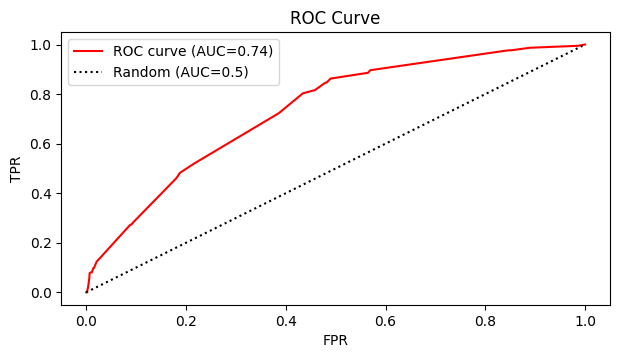

In [20]:
plot_roc()

### 3b

ROC AUC is used to evaluate the performance of a binary classification model.
It is a good metric to use because it takes into account the true positive rate and the false positive rate.


In [21]:
# 3c
rfc = RandomForestClassifier(random_state=seed)
rfc.fit(X_train, y_train)
print(
    "Random Forest Classifier AUC: "
    f"{roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]):.2f}"
)

Random Forest Classifier AUC: 0.72


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery

SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission

Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge

1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements

1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data?

---


In [22]:
req_rmsle = 0.294


def rmsle(y_true: NDArray[Any], y_pred: NDArray[Any]) -> NDArray[Any]:
    """Root Mean Squared Logarithmic Error."""
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [23]:
train = pd.read_csv("final_mission_train.csv")
test = pd.read_csv("final_mission_test.csv")

In [24]:
y_column = "nexus_rating"

nexus_rating = test["grid_connections"]
ownership_type = test["ownership_type"]
test = test.shift(1, axis=1)
test.iloc[:, 0] = ownership_type
test.iloc[:, 1] = nexus_rating

train[y_column] = np.log1p(train[y_column])

In [25]:
X_train = train.drop(columns=y_column)
y_train = train[y_column].to_numpy()
X_test = test.drop(columns=y_column)
y_test = test[y_column].to_numpy()

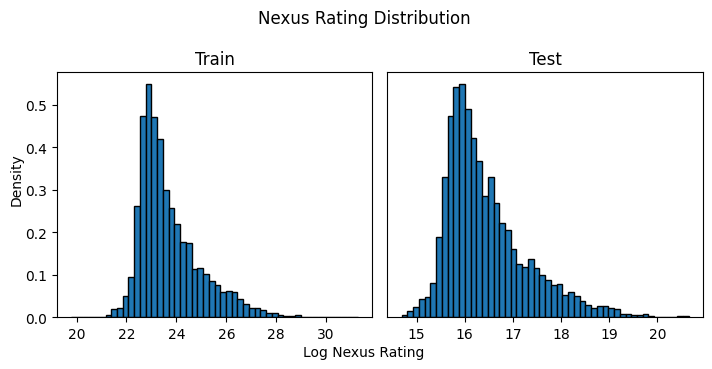

In [26]:
fig, axes = plt.subplots(1, 2)
fig.suptitle("Nexus Rating Distribution")
fig.text(0.5, 0, "Log Nexus Rating", ha="center")
fig.text(0, 0.5, "Density", va="center", rotation="vertical")

axes[0].hist(y_train, bins=50, density=True, edgecolor="black")
axes[0].set_title("Train")

axes[1].hist(np.log1p(y_test), bins=50, density=True, edgecolor="black")
axes[1].set_title("Test")
axes[1].set_yticks([])

plt.tight_layout()
plt.show()

In [29]:
# scorer = make_scorer(rmsle, greater_is_better=False)
cbr = CatBoostRegressor(
    verbose=0, iterations=1_029, learning_rate=0.051, depth=9, random_state=0
)
cbr.fit(X_train, y_train)
y_pred = np.expm1(cbr.predict(X_test))

print(f"RMSLE: {rmsle(y_test, y_pred):.3f}")
print(f"Required RMSLE: {req_rmsle}")

RMSLE: 0.2944075672966207
Required RMSLE: 0.294


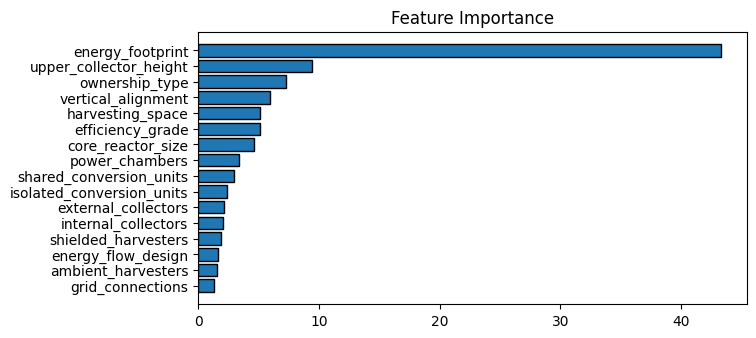

In [28]:
feature_importances = cbr.feature_importances_
indeces = np.argsort(feature_importances)
feature_importances = feature_importances[indeces]
columns = X_test.columns[indeces]

plt.barh(columns, feature_importances, edgecolor="black")
plt.title("Feature Importance")
plt.show()

### 4a

The threshold-breaking strategy was to use a `sklearn.model_selection.GridSearchCV` to find the best hyperparameters for the model. This used `rmsle` as the scoring metric.


### 4b

RMSLE is used to evaluate the performance of a regression model. It is a good metric to use because it penalizes underestimates more than overestimates.


### 4c

Apparently, the most important feature in the model is the `energy_footprint` feature, followed by the `upper_collector_height` feature. `grid_connections` is the least important feature in the model.


### 4d

Ensembling techniques were used to combine the predictions of multiple models to improve the performance of the model. Used gradient boosting through `catboost.CatBoostRegressor` to achieve the best results. The model was scored based on `RMSE`.


### 4e

To ensure that the model will work well on unseen data, the model should be trained on a large dataset. Cross-validation should be used to evaluate the model's performance on unseen data. The model should also be tested on a separate test set to ensure that it generalizes well to unseen data.
